# 上市公司财务指标可视化分析与应用
在传统的财务分析方法中，我们通过对企业盈利能力、营运能力、成长能力、偿债能力、现金流量等不同维度指标的计算，可以综合评价一个企业的财务状况。而在数字经济时代，随着大数据体系的逐渐建立，这些数据都很容易从开放的数据源中获取，从而减少了大量简单重复的计算，更多的是将关注点放在数据的分析和数据价值的挖掘上。获取上市公司年报数据的常用途径如图所示：
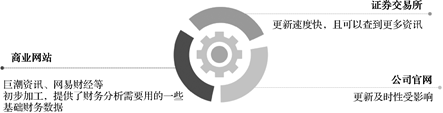
### 9-1
以格力电器（股票代码：sz.000651）为例，通过完整的数据分析流程，对格力电器近10年来的盈利情况进行分析和可视化呈现。企业数据仍使用项目五中的数据接口方法获取。
### 思路分析
1.数据采集：通过baostock数据接口采集数据。
2.数据加工：对采集数据进行整理、清洗和加工。
3.数据分析：通过计算、模型构建、可视化等方式进行数据分析。
4.数据应用：利用数据分析结果提供决策支持。
### 代码实现
#### （1）导入baostock数据接口、pandas模块。
导入模块

In [1]:
import baostock as bs
import pandas as pd

#### （2）利用query_profit_data()数据接口获取数据（详细方法可查阅项目五）。
数据准备

In [2]:
lg = bs.login() # 登录系统
result_list = []
# 放置一个列表用于接收数据接口返回的数据，取名“结果列表”
year_list =pd.date_range('20111231', periods=10, freq='1Y').strftime("%Y")
# 利用date_range()函数，生成年度数据，便于查询
for year in year_list:
    # 查询季频盈利能力数据
    return_data = bs.query_profit_data(code="sz.000651", year=year, quarter=4)
    while (return_data.error_code == '0') & return_data.next():
        result_list.append(return_data.get_row_data())   # 将查询结果添至结果列表
result_table = pd.DataFrame(result_list, columns=return_data.fields)
# 将结果列表转为DataFrame格式
bs.logout() #退出系统
result_table #输出结

login success!
logout success!


,code,pubDate,statDate,roeAvg,npMargin,gpMargin,netProfit,epsTTM,MBRevenue,totalShare,liqaShare
0,sz.000651,2012-04-25,2011-12-31,0.338857,0.063704,0.180666,5297340543.070000,1.858462,76754746050.710000,2817888750.00,2780073375.00
1,sz.000651,2013-04-27,2012-12-31,0.332792,0.074972,0.262929,7445927982.700000,2.453456,91248254915.960000,3007865439.00,2986211564.00
2,sz.000651,2014-04-25,2013-12-31,0.354521,0.092185,0.322369,10935755177.190000,3.614082,108052844520.690000,3007865439.00,2986211564.00
3,sz.000651,2015-04-28,2014-12-31,0.359563,0.103469,0.361003,14252954811.960000,4.706051,122745036614.310000,3007865439.00,2986469263.00
4,sz.000651,2016-04-29,2015-12-31,0.273413,0.129149,0.324597,12623732620.220000,2.083279,87930981568.340000,6015730878.00,5972117234.00
5,sz.000651,2017-04-27,2016-12-31,0.304205,0.143345,0.327018,15524634903.870000,2.563440,93187780602.400000,6015730878.00,5971955954.00
6,sz.000651,2018-04-26,2017-12-31,0.375051,0.151791,0.328577,22508599044.090000,3.723833,132189595255.700000,6015730878.00,5969568329.00
7,sz.000651,2019-04-29,2018-12-31,0.333959,0.133145,0.302282,26379029817.060000,4.355711,170592428489.170000,6015730878.00,5970717628.00
8,sz.000651,2020-04-30,2019-12-31,0.245151,0.125293,0.275815,24827243603.970000,4.105343,156888659016.130000,6015730878.00,5969931253.00
9,sz.000651,2021-04-29,2020-12-31,0.196811,0.132457,0.261417,22279242195.270000,3.686187,130427766473.540000,6015730878.00,5969908834.00


（3）证券数据平台证券宝提供的query_profit_data()参数说明，如表所示。

|参数名称|	参数描述|	算法说明|
|:--:|-|-|
|code|	证券代码|	|
|pubDate|	公司发布财报的日期|	|
|statDate|	财报统计的季度最后一天,比如2017-03-31、2017-06-30	||
|roeAvg|	净资产收益率（平均）|	归属母公司股东净利润/[(期初归属母公司股东的权益+期末归属母公司股东的权益)/2]×100%|
|npMargin|	销售净利率|	净利润/营业收入×100%|
|gpMargin|	销售毛利率|	毛利/营业收入×100%=(营业收入-营业成本)/营业收入×100%|
|netProfit|	净利润|	|
|epsTTM|	每股收益|	归属母公司股东的净利润/最新总股本|
|MBRevenue|	主营营业收入|	|
|totalShare|	总股本	||
|liqaShare|	流通股本	||


数据加工：更改列名

In [3]:
result_table.rename(columns={'code':'证券代码','pubDate':'发布日期','statDate':'财报日期','roeAvg':'净资产收益率','npMargin':'销售净利率','gpMargin':'销售毛利率','netProfit':'净利润','epsTTM':'每股收益','MBRevenue':'主营营业收入','totalShare':'总股本','liqaShare':'流通股本'},inplace = True)
result_table

,证券代码,发布日期,财报日期,净资产收益率,销售净利率,销售毛利率,净利润,每股收益,主营营业收入,总股本,流通股本
0,sz.000651,2012-04-25,2011-12-31,0.338857,0.063704,0.180666,5297340543.070000,1.858462,76754746050.710000,2817888750.00,2780073375.00
1,sz.000651,2013-04-27,2012-12-31,0.332792,0.074972,0.262929,7445927982.700000,2.453456,91248254915.960000,3007865439.00,2986211564.00
2,sz.000651,2014-04-25,2013-12-31,0.354521,0.092185,0.322369,10935755177.190000,3.614082,108052844520.690000,3007865439.00,2986211564.00
3,sz.000651,2015-04-28,2014-12-31,0.359563,0.103469,0.361003,14252954811.960000,4.706051,122745036614.310000,3007865439.00,2986469263.00
4,sz.000651,2016-04-29,2015-12-31,0.273413,0.129149,0.324597,12623732620.220000,2.083279,87930981568.340000,6015730878.00,5972117234.00
5,sz.000651,2017-04-27,2016-12-31,0.304205,0.143345,0.327018,15524634903.870000,2.563440,93187780602.400000,6015730878.00,5971955954.00
6,sz.000651,2018-04-26,2017-12-31,0.375051,0.151791,0.328577,22508599044.090000,3.723833,132189595255.700000,6015730878.00,5969568329.00
7,sz.000651,2019-04-29,2018-12-31,0.333959,0.133145,0.302282,26379029817.060000,4.355711,170592428489.170000,6015730878.00,5970717628.00
8,sz.000651,2020-04-30,2019-12-31,0.245151,0.125293,0.275815,24827243603.970000,4.105343,156888659016.130000,6015730878.00,5969931253.00
9,sz.000651,2021-04-29,2020-12-31,0.196811,0.132457,0.261417,22279242195.270000,3.686187,130427766473.540000,6015730878.00,5969908834.00


#### （4）提取用于盈利分析的数据，由于接口提供的数据为文本格式，为了便于计算及处理，将其转换为数值格式。
数据加工：格式转换

In [4]:
profit_data = result_table.iloc[:, 0:9]
#提取财务数据，用于分析
profit_data = profit_data.astype({'净资产收益率':'float','销售净利率':'float','销售毛利率':'float','净利润':'float','每股收益':'float','主营营业收入':'float'})
#将文本格式转化为数值格式
pd.options.display.float_format = '{:.4f}'.format#保留4位小数
profit_data

,证券代码,发布日期,财报日期,净资产收益率,销售净利率,销售毛利率,净利润,每股收益,主营营业收入
0,sz.000651,2012-04-25,2011-12-31,0.3389,0.0637,0.1807,5297340543.0700,1.8585,76754746050.7100
1,sz.000651,2013-04-27,2012-12-31,0.3328,0.0750,0.2629,7445927982.7000,2.4535,91248254915.9600
2,sz.000651,2014-04-25,2013-12-31,0.3545,0.0922,0.3224,10935755177.1900,3.6141,108052844520.6900
3,sz.000651,2015-04-28,2014-12-31,0.3596,0.1035,0.3610,14252954811.9600,4.7061,122745036614.3100
4,sz.000651,2016-04-29,2015-12-31,0.2734,0.1291,0.3246,12623732620.2200,2.0833,87930981568.3400
5,sz.000651,2017-04-27,2016-12-31,0.3042,0.1433,0.3270,15524634903.8700,2.5634,93187780602.4000
6,sz.000651,2018-04-26,2017-12-31,0.3751,0.1518,0.3286,22508599044.0900,3.7238,132189595255.7000
7,sz.000651,2019-04-29,2018-12-31,0.3340,0.1331,0.3023,26379029817.0600,4.3557,170592428489.1700
8,sz.000651,2020-04-30,2019-12-31,0.2452,0.1253,0.2758,24827243603.9700,4.1053,156888659016.1300
9,sz.000651,2021-04-29,2020-12-31,0.1968,0.1325,0.2614,22279242195.2700,3.6862,130427766473.5400


#### （5）为了更直观地看到财务指标的变化情况，将2011—2020年这10年的净资产收益率、销售净利率、销售毛利率绘制成条形图。
数据分析：绘制财报指标比较条形图

<AxesSubplot:title={'center':'2011-2020年财报指标比较'}, ylabel='财报日期'>

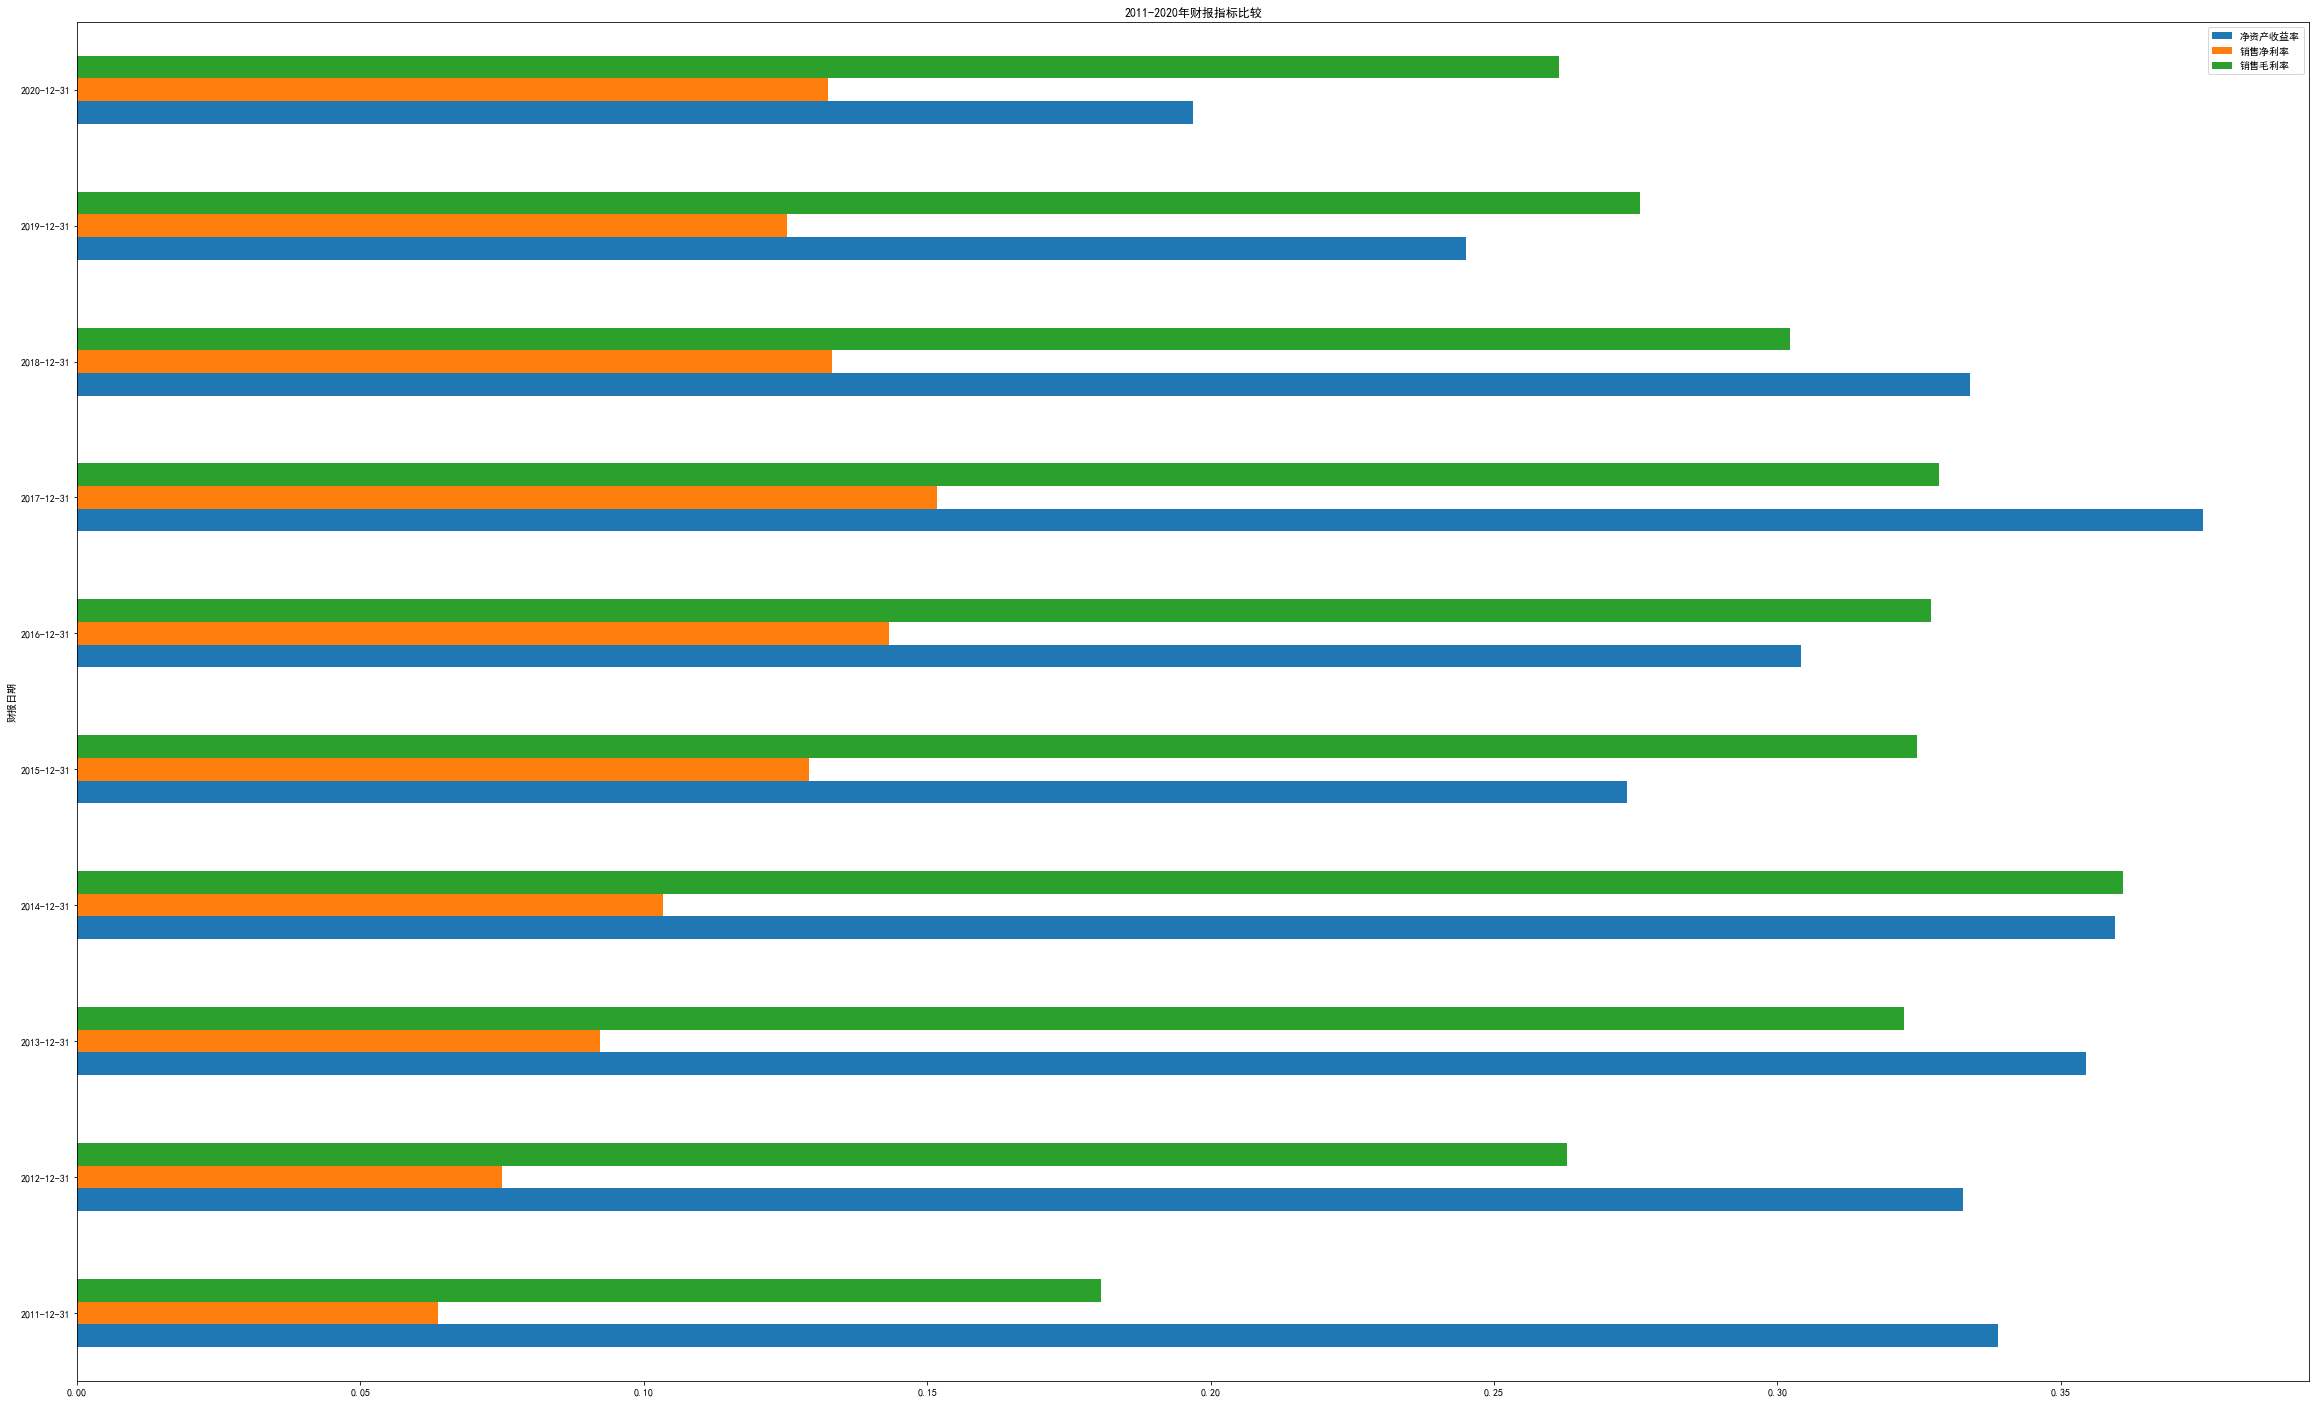

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'#设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False#中文状态下负号正常显示
profit_data.plot(x='财报日期',y=['净资产收益率','销售净利率','销售毛利率'],kind='barh',title='2011-2020年财报指标比较',figsize=(40,25))

#### （6）同时，绘制2011—2020年主营营业收入和净利润比较的柱形图。
数据分析：绘制主营营业收入与净利润比较柱形图

<AxesSubplot:title={'center':'2011—2020年主营营业收入与净利润比较'}, xlabel='财报日期'>

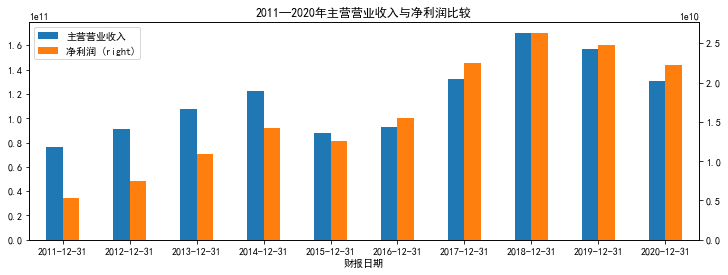

In [6]:
profit_data.plot('财报日期',['主营营业收入','净利润'],secondary_y=['净利润'],kind='bar',title='2011—2020年主营营业收入与净利润比较',figsize=(12,4),rot=0)

#### （7）同样地，为了更好地进行多维度数据分析，我们也可以同时绘制多张不同类型的子图.
数据分析：绘制多张不同类型的子图

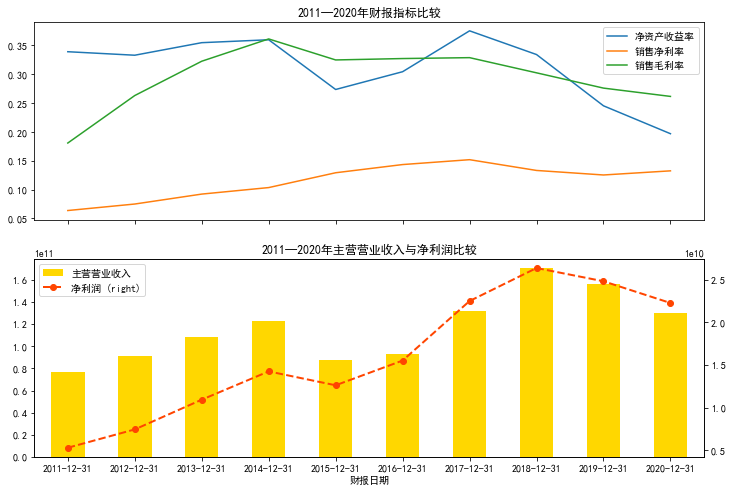

In [7]:
figure,axes = plt.subplots(2,1,figsize=(12,8),sharex=True)
ax0 = profit_data.plot('财报日期',['净资产收益率','销售净利率','销售毛利率'],title='2011—2020年财报指标比较',ax=axes[0])
ax1 = profit_data.plot('财报日期','主营营业收入',kind='bar',title='2011—2020年主营营业收入与净利润比较',color='gold',ax=axes[1])
ax2 = profit_data.plot('财报日期','净利润',secondary_y=True,color='orangered', ax=axes[1],style='--',marker='o',linewidth=2)

#### （8）用同样的方法，对格力电器的季频成长能力进行分析。
数据准备：通过query_growth_data()获取数据

In [9]:
import baostock as bs
import pandas as pd
lg = bs.login()#登录系统
result_list = []
# 放置一个列表用于接收数据接口返回的数据，取名“结果列表”
year_list =pd.date_range('20111231', periods=10, freq='1Y').strftime("%Y")
#利用date_range()函数，生成年度数据，便于查询
for year in year_list:
    # 查询季频成长能力数据
    return_data = bs.query_growth_data(code="sz.000651", year=year, quarter=4)
    while (return_data.error_code == '0') & return_data.next():
        result_list.append(return_data.get_row_data()) # 将查询结果添加至结果列表
result_table = pd.DataFrame(result_list, columns=return_data.fields)
# 将结果列表转为DataFrame格式
bs.logout()# 退出系统
result_table# 输出结果

login success!
logout success!


,code,pubDate,statDate,YOYEquity,YOYAsset,YOYNI,YOYEPSBasic,YOYPNI
0,sz.000651,2012-04-25,2011-12-31,0.323570,0.298871,0.231022,0.223684,0.224808
1,sz.000651,2013-04-27,2012-12-31,0.518904,0.262351,0.405597,0.327957,0.409157
2,sz.000651,2014-04-25,2013-12-31,0.293147,0.242967,0.468689,0.461538,0.473057
3,sz.000651,2015-04-28,2014-12-31,0.280162,0.168350,0.303407,0.304709,0.302215
4,sz.000651,2016-04-29,2015-12-31,0.076297,0.034994,-0.114308,-0.114894,-0.114638
5,sz.000651,2017-04-27,2016-12-31,0.133468,0.127841,0.229798,0.230769,0.230484
6,sz.000651,2018-04-26,2017-12-31,0.215348,0.178721,0.445968,0.447471,0.448663
7,sz.000651,2019-04-29,2018-12-31,0.391865,0.168597,0.172010,0.172043,0.169742
8,sz.000651,2020-04-30,2019-12-31,0.206143,0.126328,-0.058827,-0.057339,-0.057480
9,sz.000651,2021-04-29,2020-12-31,0.045724,-0.013267,-0.102629,-0.097324,-0.102100


（9）证券数据平台证券宝提供的query_growth_data()参数说明，如表9-2所示。
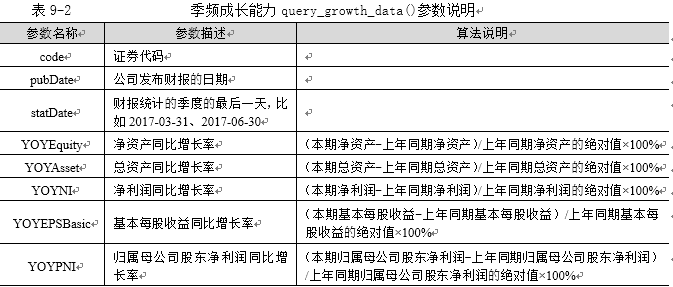
数据加工：更改列名

In [10]:
# 根据证券宝提供的参数说明，将列名更改为中文
result_table.rename(columns={'code':'证券代码','pubDate':'发布日期','statDate':'财报日期','YOYEquity':'净资产同比增长率','YOYAsset':'总资产同比增长率','YOYNI':'净利润同比增长率','YOYEPSBasic':'基本每股收益同比增长率','YOYPNI':'归属母公司股东净利润同比增长率'},inplace = True)
result_table

,证券代码,发布日期,财报日期,净资产同比增长率,总资产同比增长率,净利润同比增长率,基本每股收益同比增长率,归属母公司股东净利润同比增长率
0,sz.000651,2012-04-25,2011-12-31,0.323570,0.298871,0.231022,0.223684,0.224808
1,sz.000651,2013-04-27,2012-12-31,0.518904,0.262351,0.405597,0.327957,0.409157
2,sz.000651,2014-04-25,2013-12-31,0.293147,0.242967,0.468689,0.461538,0.473057
3,sz.000651,2015-04-28,2014-12-31,0.280162,0.168350,0.303407,0.304709,0.302215
4,sz.000651,2016-04-29,2015-12-31,0.076297,0.034994,-0.114308,-0.114894,-0.114638
5,sz.000651,2017-04-27,2016-12-31,0.133468,0.127841,0.229798,0.230769,0.230484
6,sz.000651,2018-04-26,2017-12-31,0.215348,0.178721,0.445968,0.447471,0.448663
7,sz.000651,2019-04-29,2018-12-31,0.391865,0.168597,0.172010,0.172043,0.169742
8,sz.000651,2020-04-30,2019-12-31,0.206143,0.126328,-0.058827,-0.057339,-0.057480
9,sz.000651,2021-04-29,2020-12-31,0.045724,-0.013267,-0.102629,-0.097324,-0.102100


#### （10）将数据接口提供的文本格式数据转换为数值格式数据。
数据加工：格式转换

In [11]:
growth_data = result_table.astype({'净资产同比增长率':'float','总资产同比增长率':'float','净利润同比增长率':'float','基本每股收益同比增长率':'float','归属母公司股东净利润同比增长率':'float'})
# 将文本格式转化为数值格式
pd.options.display.float_format = '{:.2f}'.format#保留2位百分数小数
growth_data

,证券代码,发布日期,财报日期,净资产同比增长率,总资产同比增长率,净利润同比增长率,基本每股收益同比增长率,归属母公司股东净利润同比增长率
0,sz.000651,2012-04-25,2011-12-31,0.32,0.30,0.23,0.22,0.22
1,sz.000651,2013-04-27,2012-12-31,0.52,0.26,0.41,0.33,0.41
2,sz.000651,2014-04-25,2013-12-31,0.29,0.24,0.47,0.46,0.47
3,sz.000651,2015-04-28,2014-12-31,0.28,0.17,0.30,0.30,0.30
4,sz.000651,2016-04-29,2015-12-31,0.08,0.03,-0.11,-0.11,-0.11
5,sz.000651,2017-04-27,2016-12-31,0.13,0.13,0.23,0.23,0.23
6,sz.000651,2018-04-26,2017-12-31,0.22,0.18,0.45,0.45,0.45
7,sz.000651,2019-04-29,2018-12-31,0.39,0.17,0.17,0.17,0.17
8,sz.000651,2020-04-30,2019-12-31,0.21,0.13,-0.06,-0.06,-0.06
9,sz.000651,2021-04-29,2020-12-31,0.05,-0.01,-0.10,-0.10,-0.10


#### （11）绘制2011—2020年成长能力多维分析图。
数据分析：绘制可视化图表

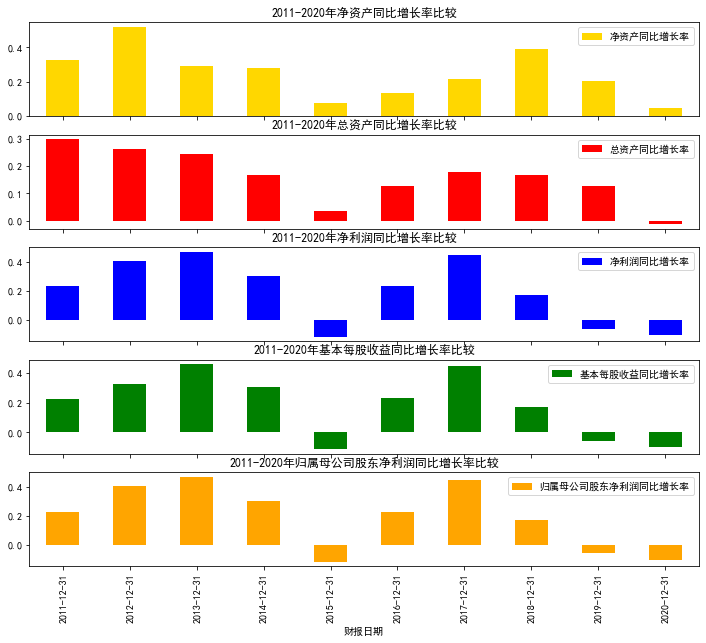

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'# 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False# 中文状态下负号正常显示
figure,axes = plt.subplots(5,1,figsize=(12,10),sharex=True)
ax0 = growth_data.plot('财报日期',['净资产同比增长率'],title='2011-2020年净资产同比增长率比较',kind='bar',color='gold',ax=axes[0])
ax1 = growth_data.plot('财报日期',['总资产同比增长率'],title='2011-2020年总资产同比增长率比较',kind='bar',color='red',ax=axes[1])
ax2 = growth_data.plot('财报日期',['净利润同比增长率'],title='2011-2020年净利润同比增长率比较',kind='bar',color='blue',ax=axes[2])
ax3 = growth_data.plot('财报日期',['基本每股收益同比增长率'],title='2011-2020年基本每股收益同比增长率比较',kind='bar',color='green',ax=axes[3])
ax4 = growth_data.plot('财报日期',['归属母公司股东净利润同比增长率'],title='2011-2020年归属母公司股东净利润同比增长率比较',kind='bar',color='orange',ax=axes[4])

### 业务总结
在财务分析的入门阶段，分析的数据主要来源于财务报表、科目余额表、账务数据等，Excel的函数和图表分析功能基本能够满足初级数据分析的需求，尤其是在数据量不大的时候，Excel的操作便捷性可能优于Python的pandas模块等。随着数据可视化需求的增加，以Power BI为代表的商业智能软件，成了图表分析的利器。Python则依靠功能强大的模块，比如matplotlib，pyecharts，增加可视化图表的灵活性，可以更好地满足特殊的需求。业财融合将交易级别的海量业务数据、非财务信息同财务数据融合在一起，这时候就需要进行复杂的数据抽取、模型构建、数据挖掘等，Excel很难满足这样的应用需求，而用Python读取庞大数据，处理加工高阶数据的优势和效率便体现出来。将得到的数据分析结果应用于管理决策中，才是数据分析的真正意义所在。